<a href="https://colab.research.google.com/github/Yashmaini30/Breast-Cancer-Detection/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Library Imports


In [ ]:
import tensorflow as tf
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import random

from google.colab import drive

In [ ]:
drive.mount('/content/drive')
path = "../content/drive/MyDrive/Dataset_BUSI_with_GT/"
data_dir = Path(path)

Mounted at /content/drive


In [ ]:
if not data_dir.exists():
    print("The specified path does not exist.")
else:
    all_items = os.listdir(path)
    print("Contents of the dataset directory using os.listdir:", all_items)

Contents of the dataset directory using os.listdir: ['normal', 'malignant', 'benign']


class names


In [ ]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['benign', 'malignant', 'normal'], dtype='<U9')

Defining Path


In [ ]:
benignPath = os.path.join(data_dir, "benign")
malignPath = os.path.join(data_dir, "malignant")
normalPath = os.path.join(data_dir, "normal")

No. of Images


In [ ]:
imageCount = len(list(data_dir.glob('*/*.png')))
imageCount

1578

Plotting Random Images


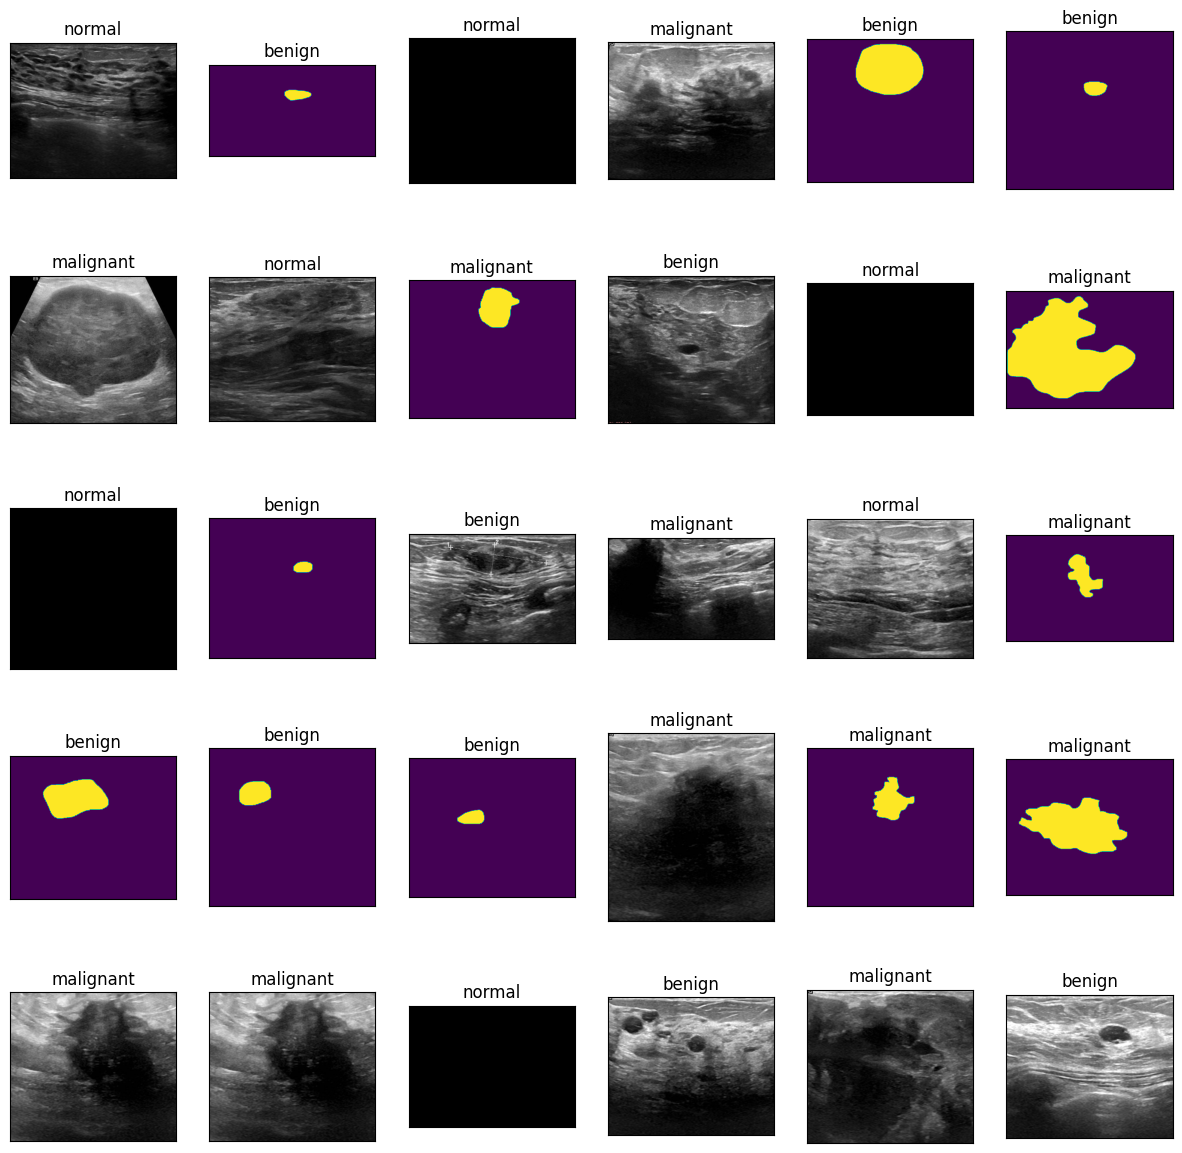

In [ ]:
plt.figure(figsize=(15,15))

for i in range(30):
    plt.subplot(5,6,i+1)
    random_class = random.choice(class_names)
    img = plt.imread(random.choice(list(data_dir.glob(random_class+"/*.png"))))
    plt.xticks([])
    plt.yticks([])
    plt.title(random_class)
    plt.imshow(img)

In [ ]:
import imghdr

data_dir = "../content/drive/MyDrive/Dataset_BUSI_with_GT/"
image_extensions = [".png", ".jpg"]

img_type_accepted_by_tf = ["gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

**BUILD CNN**

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

separating datasets


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
                  data_dir,
                  validation_split=0.2,
                  subset="training",
                  seed=123,
                  image_size=(img_height, img_width),
                  batch_size=batch_size)


val_data = image_dataset_from_directory(data_dir,
                                        validation_split=0.2,
                                        subset="validation",
                                        seed=123,
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)

Found 1578 files belonging to 3 classes.
Using 1263 files for training.
Found 1578 files belonging to 3 classes.
Using 315 files for validation.


In [ ]:
from tensorflow.keras import layers
model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3,activation="softmax")
])

In [ ]:
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=["accuracy"])

In [ ]:
epochs = 2
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data,
                    batch_size=batch_size)

Epoch 1/2
40/40 [==============================] - 97s 2s/step - loss: 0.5477 - accuracy: 0.7585 - val_loss: 0.6896 - val_accuracy: 0.6794
Epoch 2/2
40/40 [==============================] - 89s 2s/step - loss: 0.4261 - accuracy: 0.8060 - val_loss: 0.8048 - val_accuracy: 0.7270


In [ ]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

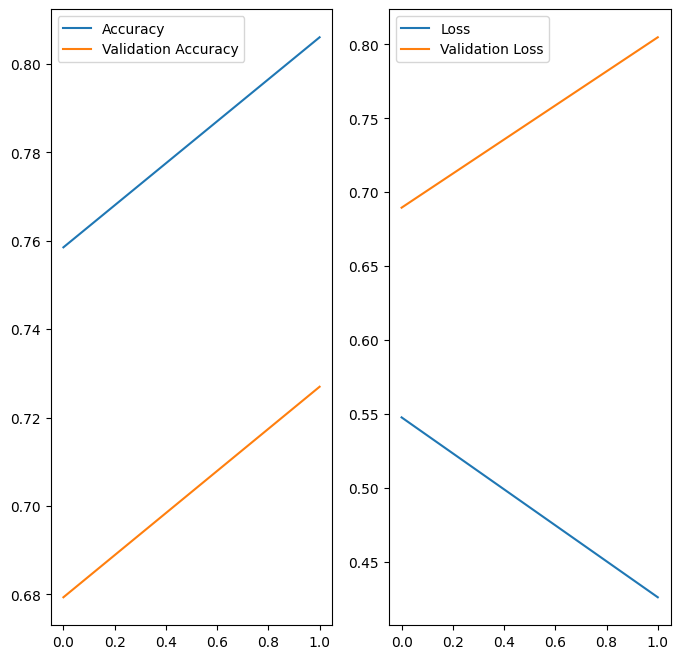

In [ ]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

In [ ]:
model.evaluate(val_data)

10/10 [==============================] - 8s 469ms/step - loss: 0.8048 - accuracy: 0.7270


[0.8047940731048584, 0.7269841432571411]

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)       

1/1 [==============================] - 0s 56ms/step


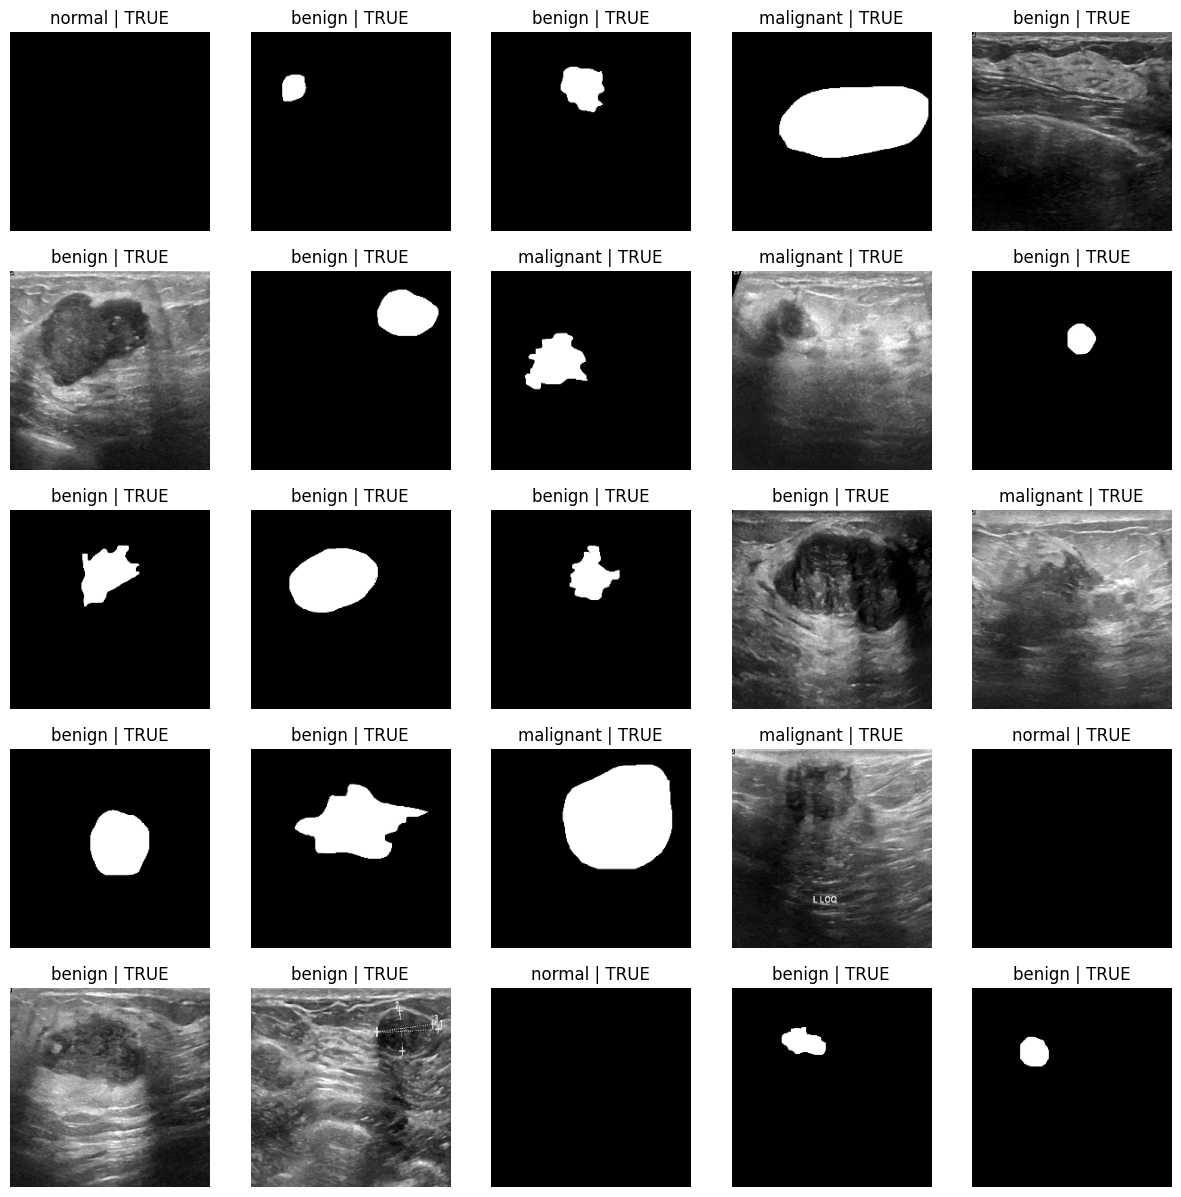

In [ ]:
plt.figure(figsize=(15, 15))
class_names = val_data.class_names
result = ' | False'
for images, labels in val_data.take(1):
    for i in range(25):

        ax = plt.subplot(5,5, i + 1)
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)

        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'

        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result  )
        plt.axis("off")